# 1、数据区域和元数据
PyTorch 中的 tensor 内部结构通常包含了 数据区域(Storage) 和 元数据(Metadata) ：

数据区域 ： 存储了 tensor 的实际数据，且数据被保存为连续的数组。比如： a = torch.tensor([[1, 2, 3], [4, 5, 6]])，它的数据在存储区的保存形式为 [1, 2, 3, 4, 5, 6]

元数据 ：包含了 tensor 的一些描述性信息，比如 : 尺寸(Size)、步长(Stride)、数据类型(Data Type) 等信息

占用内存的主要是 数据区域，且取决于 tensor 中元素的个数， 而元数据占用内存较少。

采用这种 【数据区域 + 元数据】 的数据存储方式，主要是因为深度学习的数据动辄成千上万，数据量巨大，所以采取这样的存储方式以节省内存

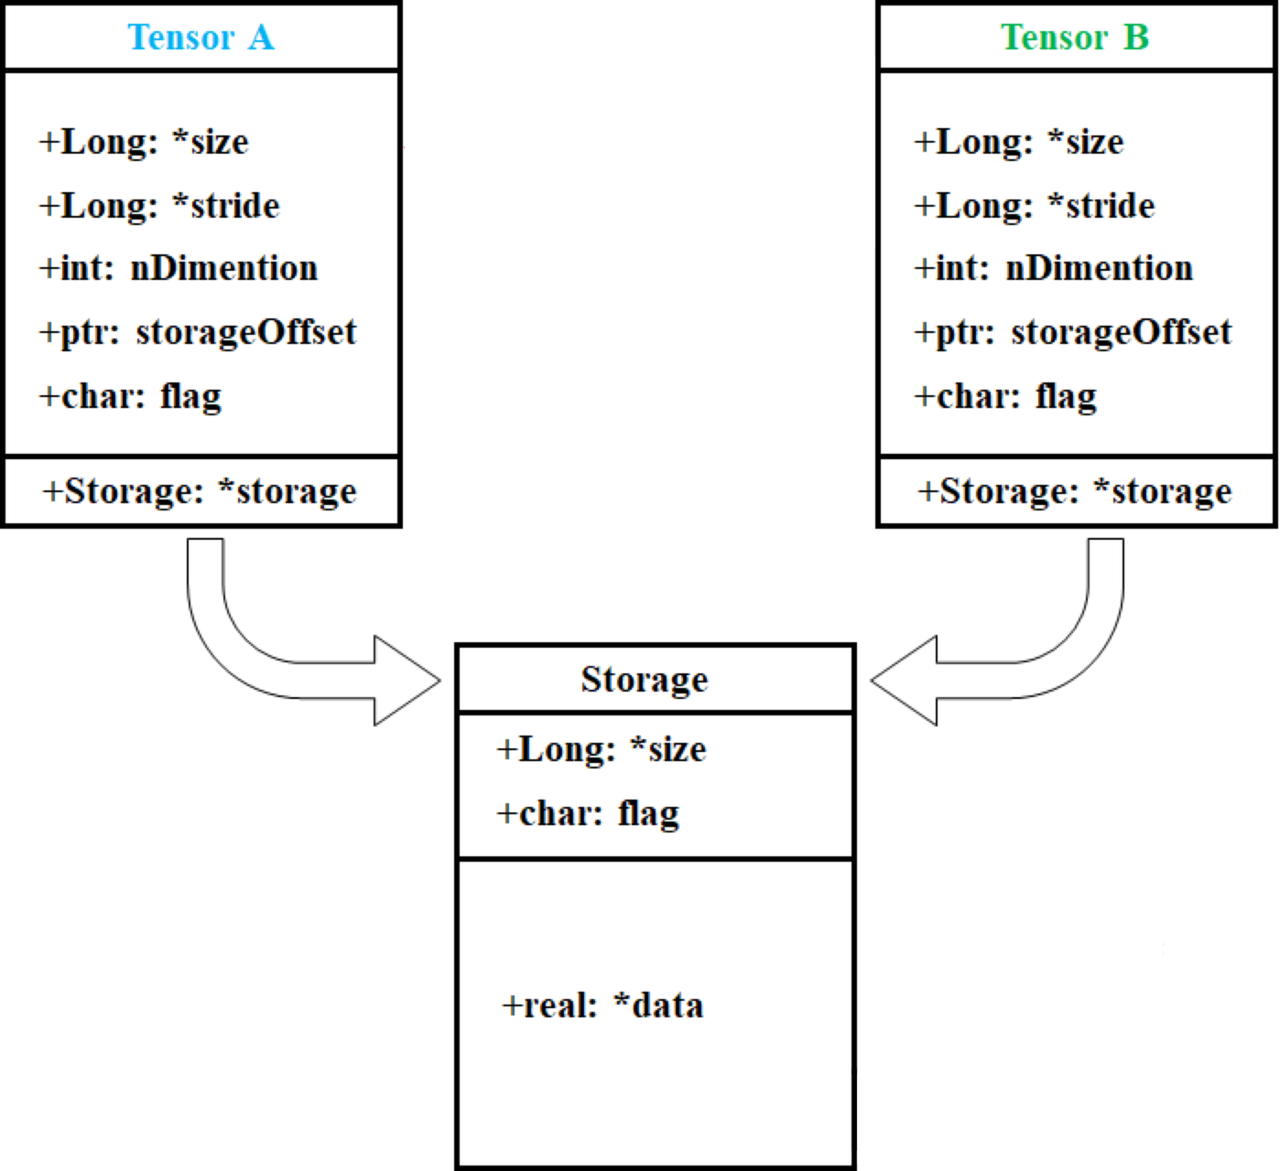

# 2、查看 tensor 的存储区数据:  storage() 

In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(a.storage())

# 3、查看 tensor 的步长:  stride() 

stride()  :  在指定维度 (dim) 上，存储区中的数据元素，从一个元素跳到下一个元素所必须的步长

a = torch.randn(3, 2)
print(a.stride())  # (2, 1)

解读：

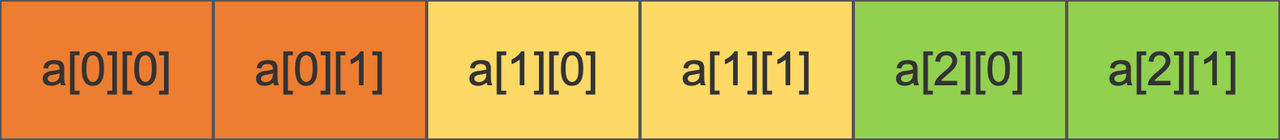

在第 0 维，想要从一个元素跳到下一个元素，比如从 a[0][0]   到  a[1][0] ，需要经过 2个元素，步长是 2

在第 1 维，想要从一个元素跳到下一个元素，比如从 a[0][0]   到  a[0][1]， 需要经过 1个元素，步长是 1

# 4、查看 tensor 的偏移量：storage_offset()  
表示 tensor 的第 0 个元素与真实存储区的第 0 个元素的偏移量

In [ ]:
a = torch.tensor([1, 2, 3, 4, 5])
b = a[1:]   # tensor([2, 3, 4, 5])
c = a[3:]   # tensor([4, 5])
print(b.storage_offset())   # 1
print(c.storage_offset())   # 3

b 的第 0 个元素与 a 的第 0 个元素之间的偏移量是 1

c 的第 0 个元素与 a 的第 0 个元素之间的偏移量是 3

# 5、观察存储区
一般来说，一个 tensor 有着与之对应的 storage， storage 是在 data 之上封装的接口。

不同 tensor 的元数据一般不同，但却可能使用相同的 storage。

a.storage() ：查看 a 存储的数据内容

id(a)：查看 a 的内存地址

id(a.storage)：查看 a 的存储区的内存地址

data_ptr()：返回 a 首元素的内存地址

In [ ]:
# 1）观察一
import torch

a = torch.arange(0, 6)
print('a = {}\n'.format(a))
print('tensor a 存储区的数据内容 ：{}\n'.format(a.storage()))
print('tensor a 相对于存储区数据的偏移量 ：{}\n'.format(a.storage_offset()))

print('*'*20, '\n')

b = a.view(2,3)
print('b = {}\n'.format(b))
print('tensor b 存储区的数据内容 ：{}\n'.format(b.storage()))
print('tensor b 相对于存储区数据的偏移量 ：{}\n'.format(b.storage_offset()))

In [ ]:
# 2）观察二
import torch

a = torch.tensor([1, 2, 3, 4, 5, 6])
b = a.view(2, 3)

print(id(a.storage) == id(b.storage))   # True

a[1] = 100
print(a)
print(b)

# (a.storage) == id(b.storage) 为 True 说明 tensor a 和 tensor b 共享相同的存储区，即，它们指向相同的底层数据存储对象。

# 当 改变 a 中元素的值，b 也会跟着改变，因为它们是共享 storage 的。

In [ ]:
# 3）观察三
import torch

a = torch.tensor([1, 2, 3, 4, 5, 6])
c = a[2:]

print(c.storage())

print('\n', '*'*20, '\n')

print('tensor a 首元素的内存地址 : {}'.format(a.data_ptr()))
print('tensor c 首元素的内存地址 : {}'.format(c.data_ptr()))
print(c.data_ptr() - a.data_ptr())

print('\n', '*'*20, '\n')

c[0] = -100
print(a)

# data_ptr() 返回 tensor 首元素的内存地址
# c 和 a 的首元素内存地址相差 16，每个元素占用 8 个字节（LongStorage）， 也就是首元素相差两个元素
# 改变 c 的首元素， a 对应位置的元素值也被改变

# 5、总结
1.由上可知，绝大多数操作并不修改 tensor 的数据，只是修改了 tensor 的元数据，比如修改 tensor 的 offset 、stride 和 size ，这种做法更节省内存，同时提升了处理速度。

2.有些操作会导致 tensor 不连续，这时需要调用 torch.contiguous 方法将其变成连续的数据，该方法会复制数据到新的内存，不再与原来的数据共享 storage。
